**Disease Predictor**

# Day 1

In [6]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"uzairmalikum","key":"e3a9cafa7d12deb8560d3b981083b762"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp 'kaggle (1).json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!pip install kaggle

In [9]:
# Download and unzip the dataset
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease-data --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 47.9MB/s]


In [10]:
import pandas as pd
df=pd.read_csv("/content/heart-disease-data/heart_disease_uci.csv")
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [11]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [12]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [13]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

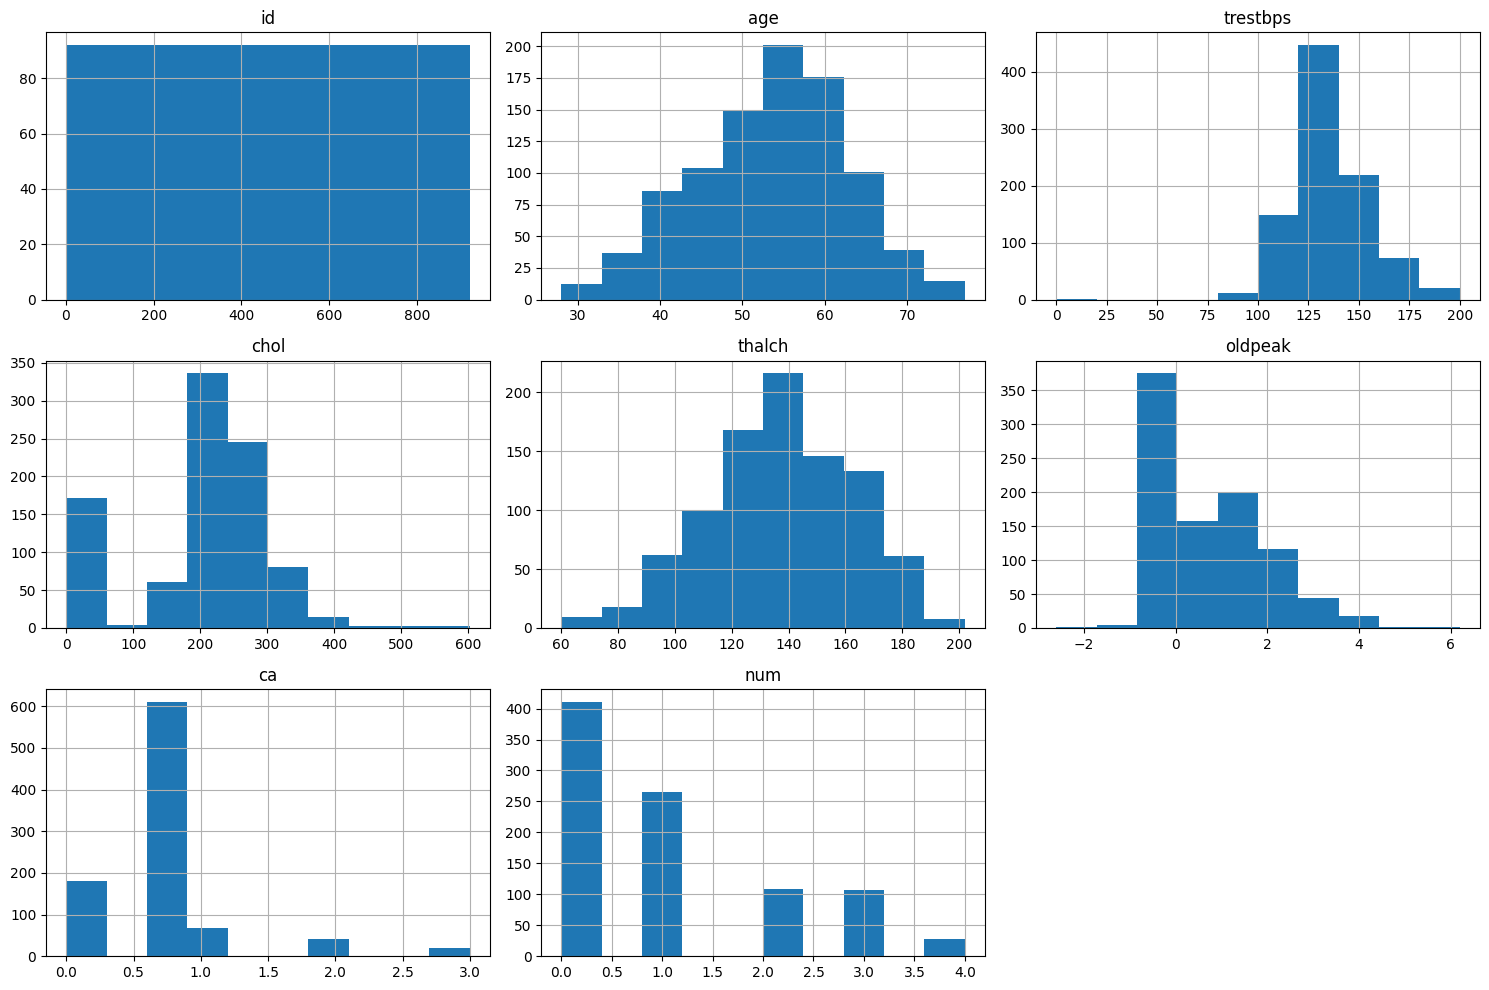

In [15]:
df[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

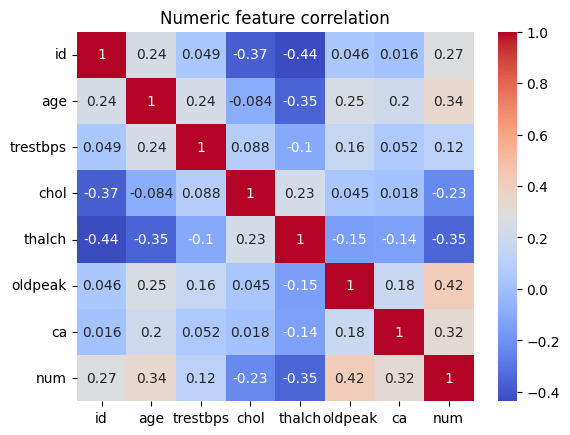

In [17]:
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.title("Numeric feature correlation")
plt.show()

# **Day 2 Model Training**

In [18]:
Cat_cols=df.select_dtypes(include='object').columns.tolist()#one-hot encode all 'object' categorical columns
if 'num' in Cat_cols:
  Cat_cols.remove('num')#dont encode target columns

In [19]:
x=df.drop('num',axis=1)
y=(df['num']>0).astype(int)# 0 no disease,1 disease

In [20]:
x=pd.get_dummies(x,columns=Cat_cols)
print("final feature columns:",x.columns)

final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


# **Day 3 Train /Test split ,Normalization,Modelling,Model** **Evaluation**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

new value =(x-mean)/standard deviation

In [23]:
scalar= StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression#its about classification


In [25]:
lr_model=LogisticRegression()   #giving admission to a new student
lr_model.fit(X_train_scaled,y_train)#main training step

LogisticRegression()

Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score , classification_report

In [27]:
y_pred_lr=lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

Logistic Regression Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



# **day 4 :Random forest and feature importance**



In [28]:
from sklearn.metrics import confusion_matrix

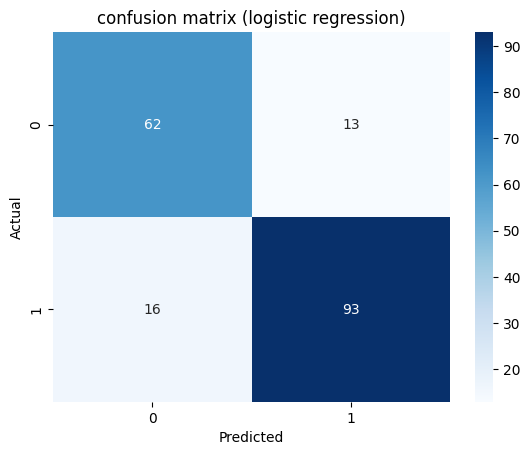

In [29]:
cm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("confusion matrix (logistic regression)")
plt.show()

Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train_scaled,y_train)
y_pred_rf=rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred_rf))


Random Forest Accuracy: 0.8858695652173914


feature importance

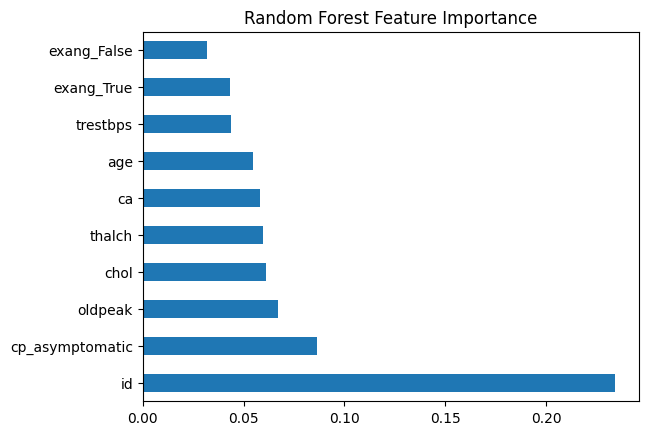

In [32]:
feat_imp=pd.Series(rf_model.feature_importances_,index=x.columns).sort_values(ascending=False)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()


save the model into a environment

In [33]:
import joblib
joblib.dump(rf_model,'heart_rf_model.pkl')
joblib.dump(scalar,'heart_scaler.pkl')

['heart_scaler.pkl']

creating a tempelate:


In [34]:
sample =x.head(1)
sample.to_csv('heart_user_template.csv',index=False)
print("User Template saved as 'heart_user_template.csv'")

User Template saved as 'heart_user_template.csv'


# * ***day 5:user upload and prediction***


In [35]:
import joblib
import pandas as pd

user_df = pd.read_csv('/content/heart-disease-data/heart_disease_uci.csv')

#getting columns list from training dataframe
numeric_cols =df.select_dtypes(include=['number']).columns.tolist()
cat_cols=df.select_dtypes(include='object').columns.tolist()
bool_cols=df.select_dtypes(include='bool').columns.tolist()

#droping

numeric_cols=[col for col in numeric_cols if col in user_df.columns]
cat_cols=[col for col in cat_cols if col in user_df.columns]
bool_cols=[col for col in bool_cols if col in user_df.columns]

#fill the missing numeric column,cat column and bool column

user_df[numeric_cols]=user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

for col in cat_cols:
  user_df[col]=user_df[col].fillna(user_df[col].mode()[0])

for col in bool_cols:
  user_df[col]=user_df[col].fillna(False)
#one-hot encodin cat columns
user_df_encoded=pd.get_dummies(user_df,columns=cat_cols)
#alighn columns
user_df_encoded=user_df_encoded.reindex(columns=x.columns,fill_value=0)
#scale data
scaler =joblib.load('heart_scaler.pkl')
user_df_scaled=scaler.transform(user_df_encoded)
#load model||prediction
model=joblib.load('heart_rf_model.pkl')
preds=model.predict(user_df_scaled)
user_df['Heart_Disease_Prediction']=preds
#show result
print(user_df)

      id  age     sex        dataset               cp    trestbps   chol  \
0      1   63    Male      Cleveland   typical angina  145.000000  233.0   
1      2   67    Male      Cleveland     asymptomatic  160.000000  286.0   
2      3   67    Male      Cleveland     asymptomatic  120.000000  229.0   
3      4   37    Male      Cleveland      non-anginal  130.000000  250.0   
4      5   41  Female      Cleveland  atypical angina  130.000000  204.0   
..   ...  ...     ...            ...              ...         ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic  127.000000  333.0   
916  917   62    Male  VA Long Beach   typical angina  132.132404  139.0   
917  918   55    Male  VA Long Beach     asymptomatic  122.000000  223.0   
918  919   58    Male  VA Long Beach     asymptomatic  132.132404  385.0   
919  920   62    Male  VA Long Beach  atypical angina  120.000000  254.0   

       fbs           restecg      thalch  exang   oldpeak        slope  \
0     True   

/tmp/ipython-input-739827582.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_df[col]=user_df[col].fillna(user_df[col].mode()[0])
